# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Convert datatype from float to int

In [4]:
df["Diabetes_012"] = df["Diabetes_012"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [5]:
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


No null values.

In [6]:
print(df.duplicated().sum())

23899


23899 duplicate rows.

## Remove duplicate rows

In [7]:
df = df.drop_duplicates()

## Quick overall visualization of data

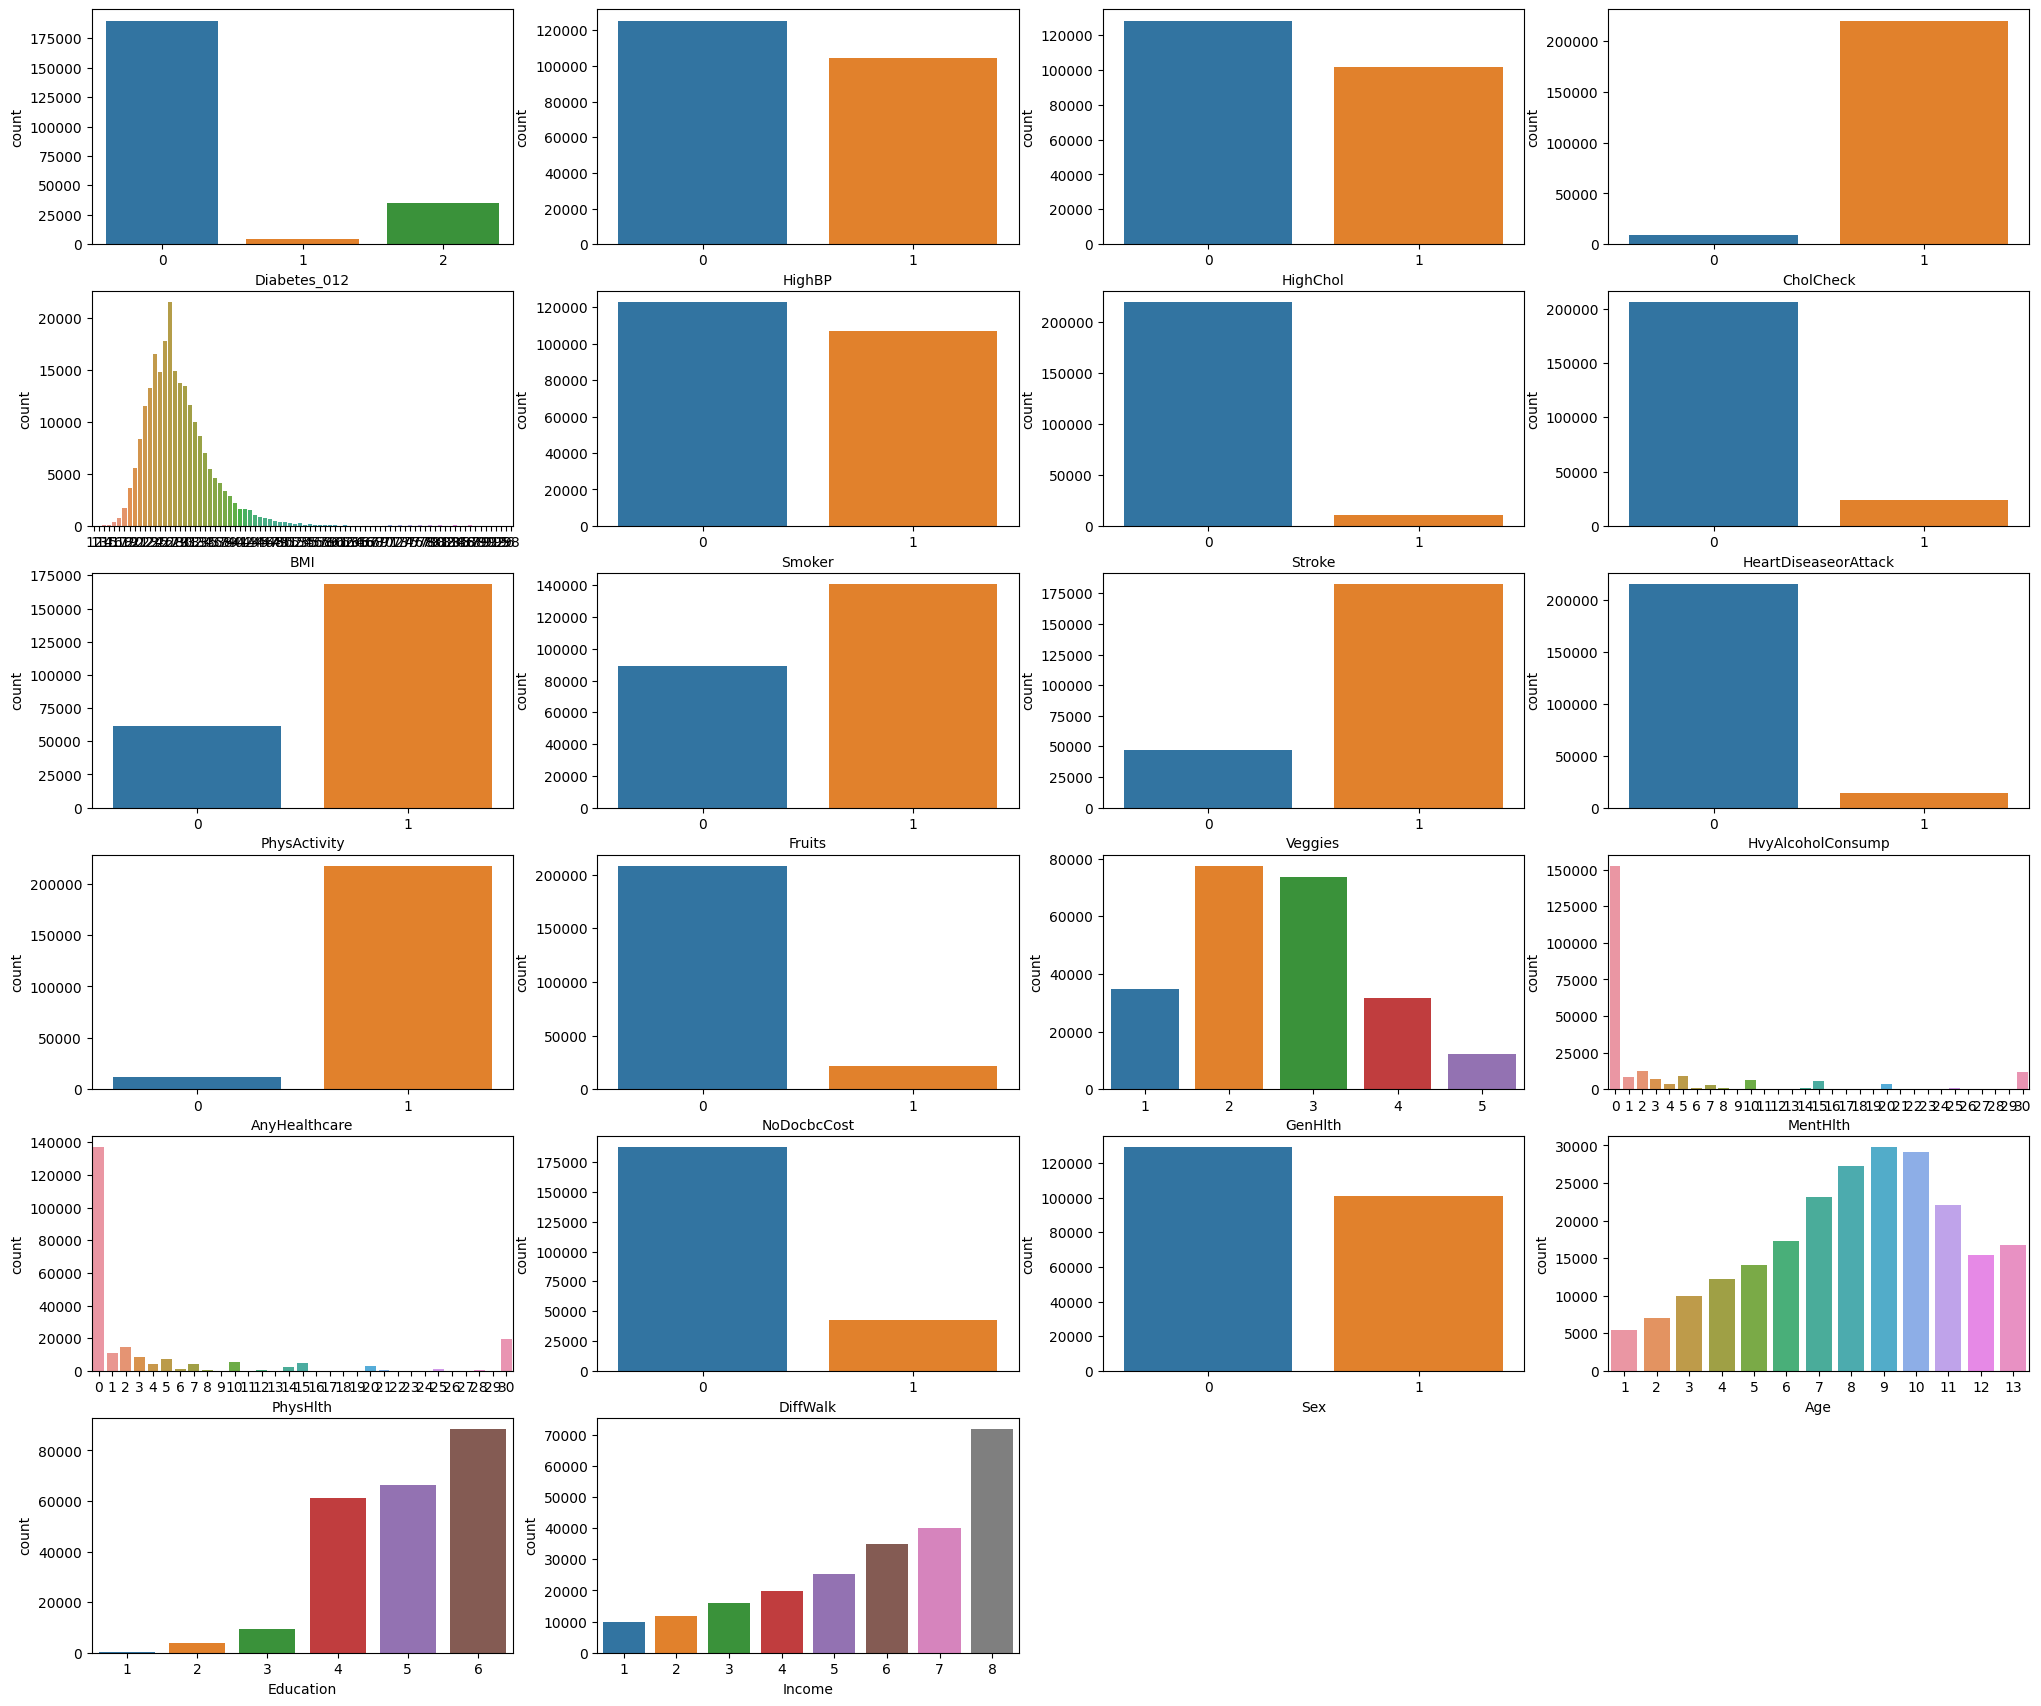

In [8]:
plt.figure(figsize=(25,25))
for i, col in enumerate(df.columns):
    plt.subplot(7,4,i+1)
    sns.countplot(data=df, x=col)
plt.show()

## CholCheck

1    220483
0      9298
Name: CholCheck, dtype: int64


<AxesSubplot: xlabel='CholCheck', ylabel='count'>

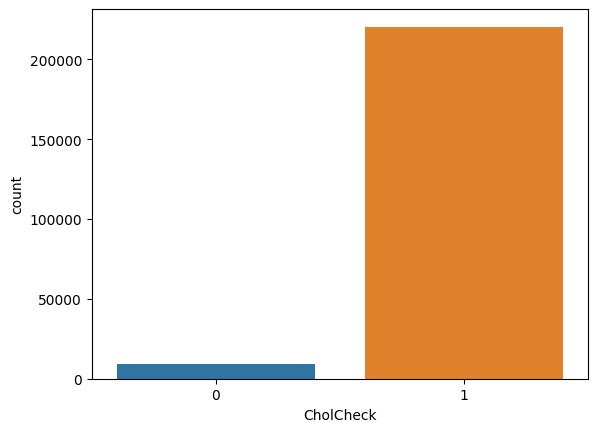

In [9]:
print(df['CholCheck'].value_counts())
sns.countplot(df, x='CholCheck')

For more accurate data, we want to make sure the cholesterol data is recent. Hence we remove those whose cholestoral was not checked in the last 5 years.

In [10]:
print(df.shape)
df = df.loc[df['CholCheck'] == 1]
df = df.drop('CholCheck', axis=1)
print(df.shape)

(229781, 22)
(220483, 21)


## Response Variable

0    181060
2     34856
1      4567
Name: Diabetes_012, dtype: int64


<AxesSubplot: xlabel='Diabetes_012', ylabel='count'>

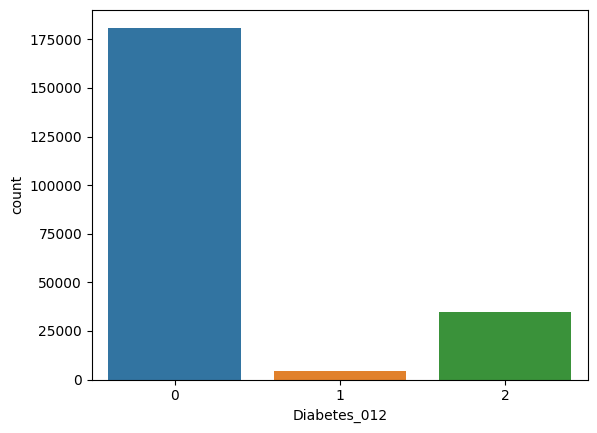

In [11]:
print(df['Diabetes_012'].value_counts())
sns.countplot(df, x='Diabetes_012')

Heavy class imbalance of target variable. As we are trying to assess the risk of diabetes, we will combine data of Pre-diabetes with Diabetes.

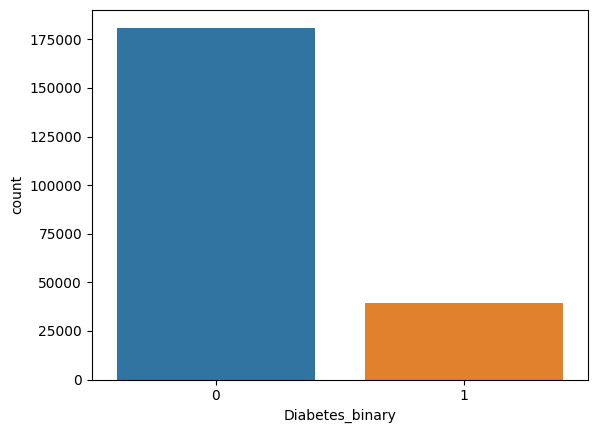

In [12]:
df = df.replace({'Diabetes_012': {2:1}}).rename(columns={'Diabetes_012': 'Diabetes_binary'})
sns.countplot(data=df, x='Diabetes_binary')
plt.show()

Balancing target variable using undersampling of 0 (No diabetes) to get a 50-50 split

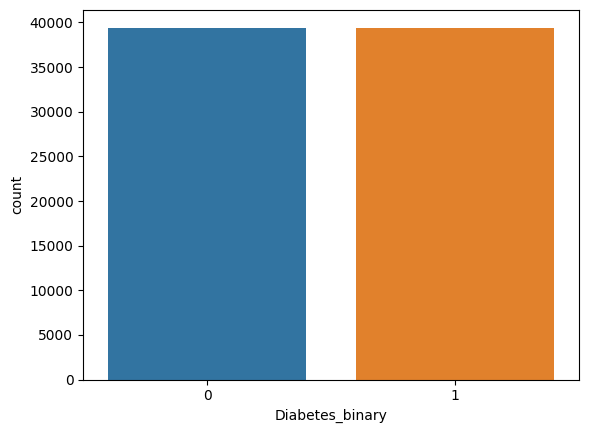

In [13]:
from sklearn.utils import resample

no_diabetes = df[df['Diabetes_binary'] == 0]
diabetes = df[df['Diabetes_binary'] == 1]
no_diabetes_resampled = resample(no_diabetes, replace=False, n_samples=len(diabetes))

balanced_df = pd.concat([diabetes, no_diabetes_resampled])

sns.countplot(data=balanced_df, x='Diabetes_binary')
plt.show()

## Quick visualization of balanced dataset

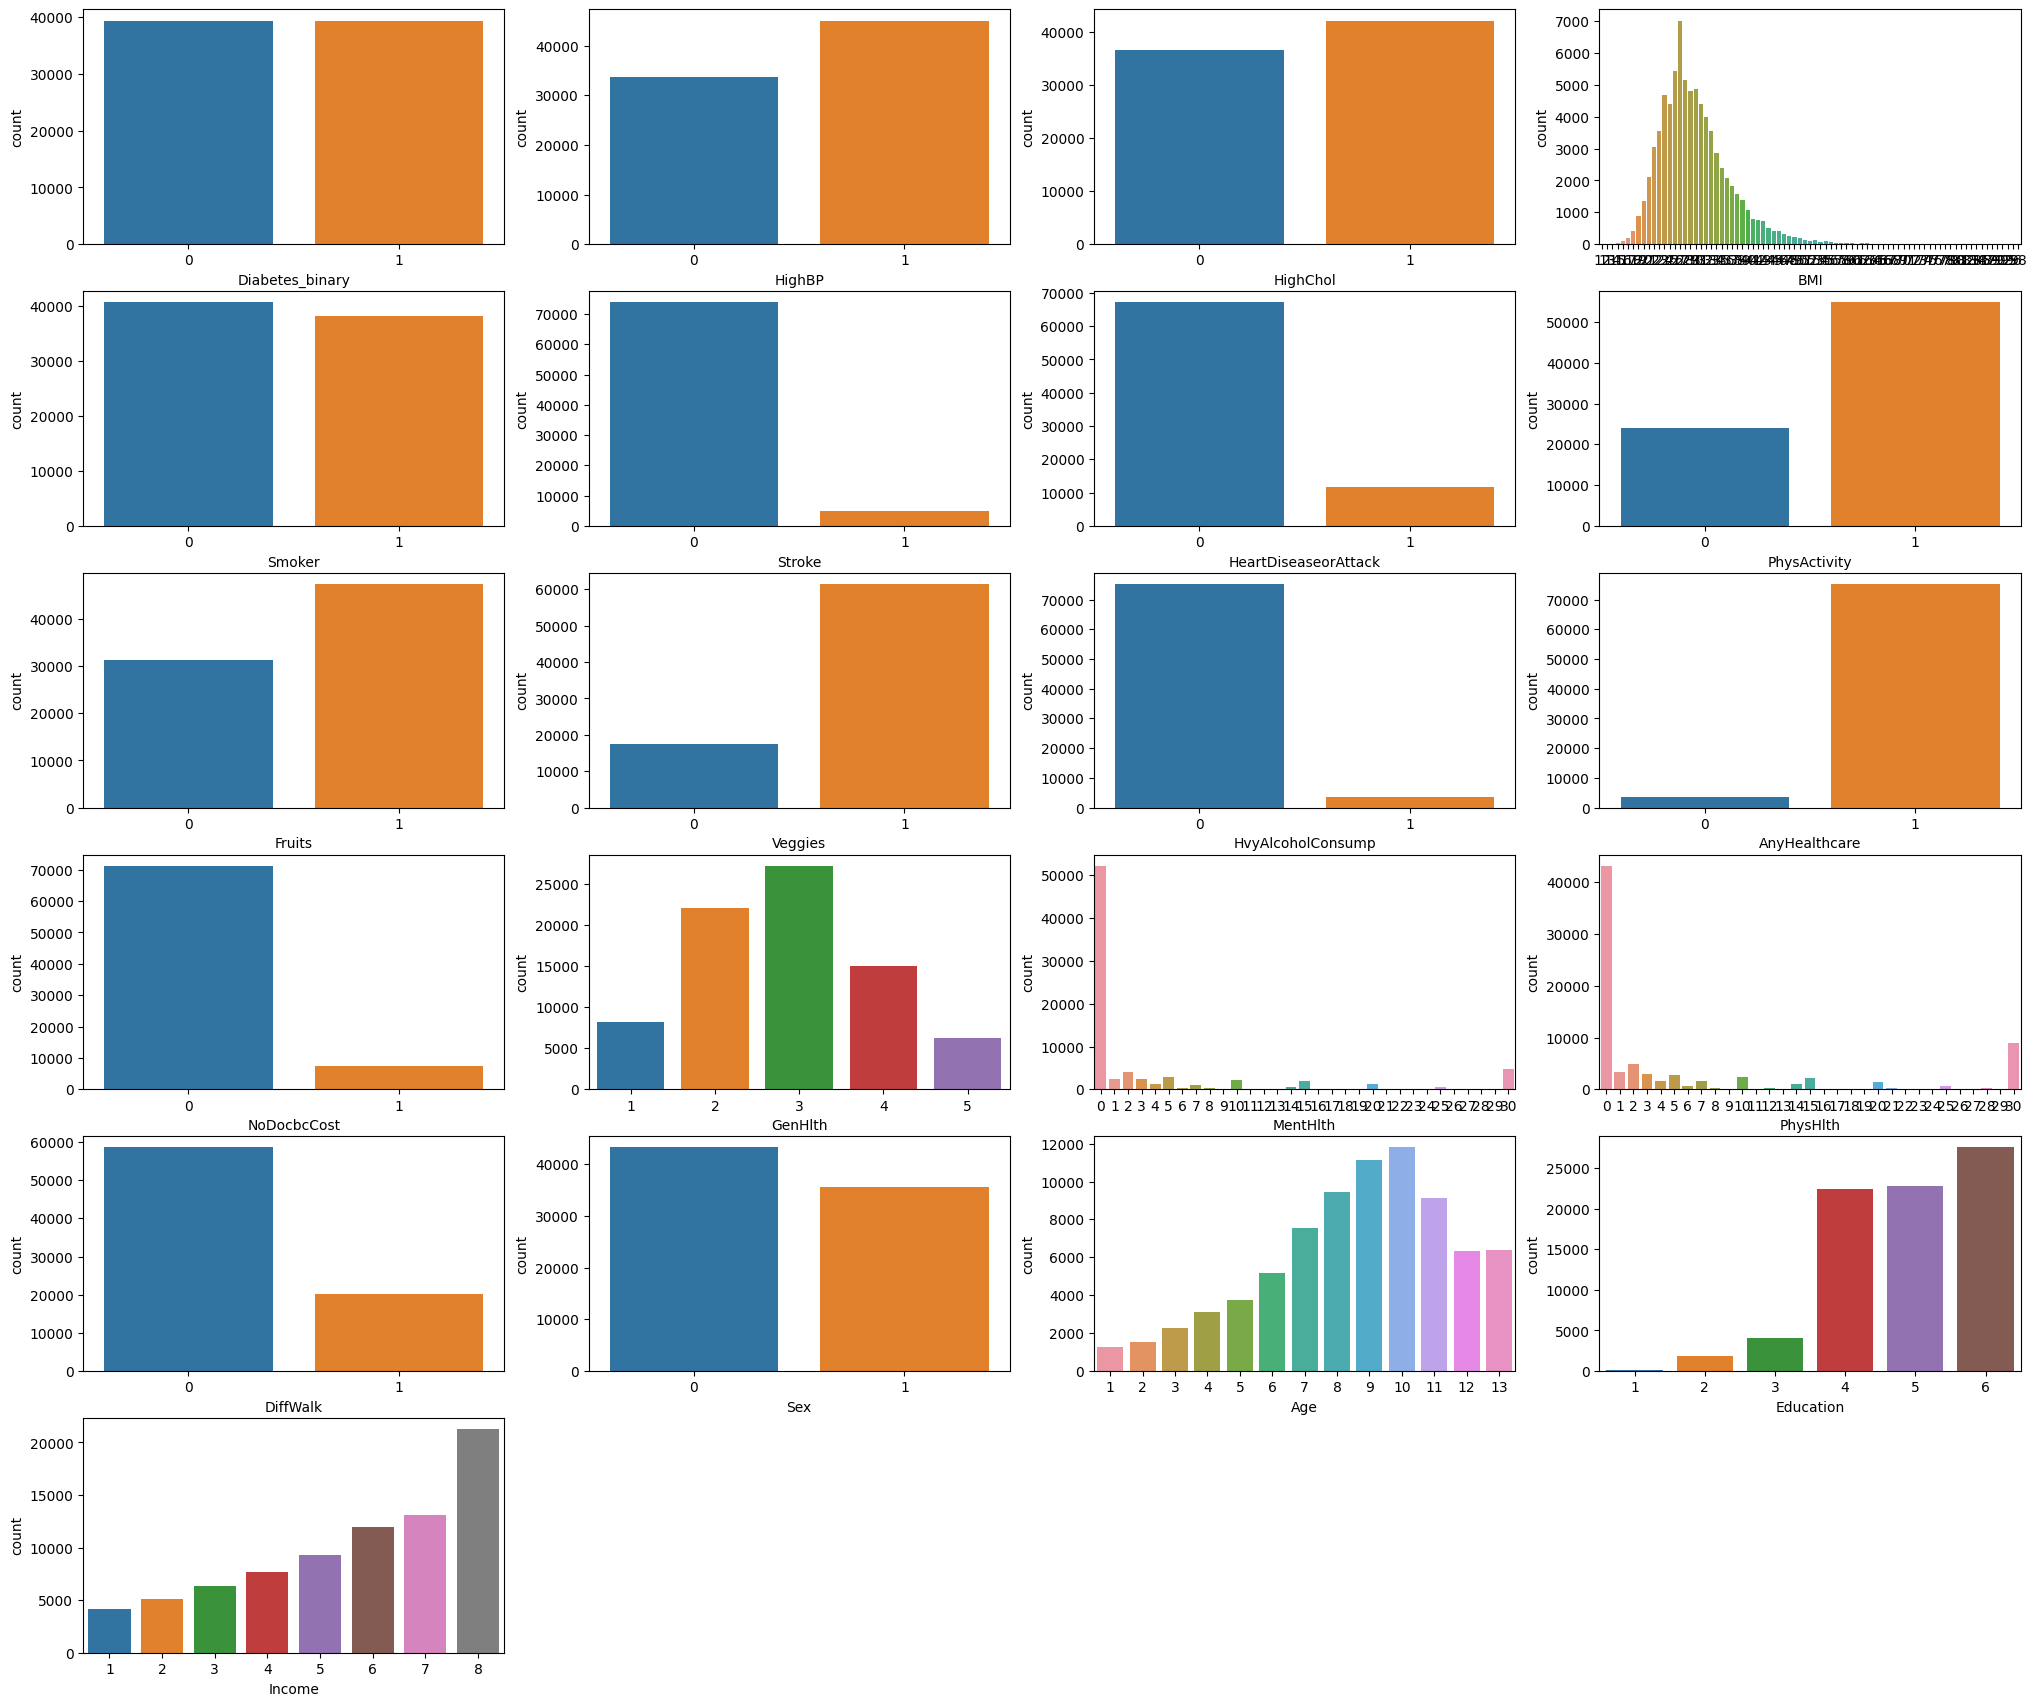

In [14]:
plt.figure(figsize=(25,25))
for i, col in enumerate(balanced_df.columns):
    plt.subplot(7,4,i+1)
    sns.countplot(data=balanced_df, x=col)
plt.show()

## Export balanced data

In [15]:
balanced_df.to_csv('balanced_dataset.csv', index=False)